In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np
import time
import pandas as pd
plt.style.use(['science', 'ieee','no-latex'])

from tools import utils, formats
from floweaver import *
from pySankey import sankey
import plotly.graph_objects as go

In [2]:
def bar_plot(xvalue = [0,0], yvalue = [0,0], xlabel = None, ylabel = None, filepath = 'outputs/example.png'):
    ax = plt.figure().gca()
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.bar(xvalue, yvalue, color=(0.3, 0.3, 0.45 ,.4), edgecolor=(0, 0, 0, 1))
    # plt.grid(ls= ':', color='#6e6e6e', lw=0.5);
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.figure.savefig(filepath)
    return

# 1. Year2 Bar Plots 

{'THE': 30, 'BAL': 28, 'EXP': 15, 'NONE': 10}


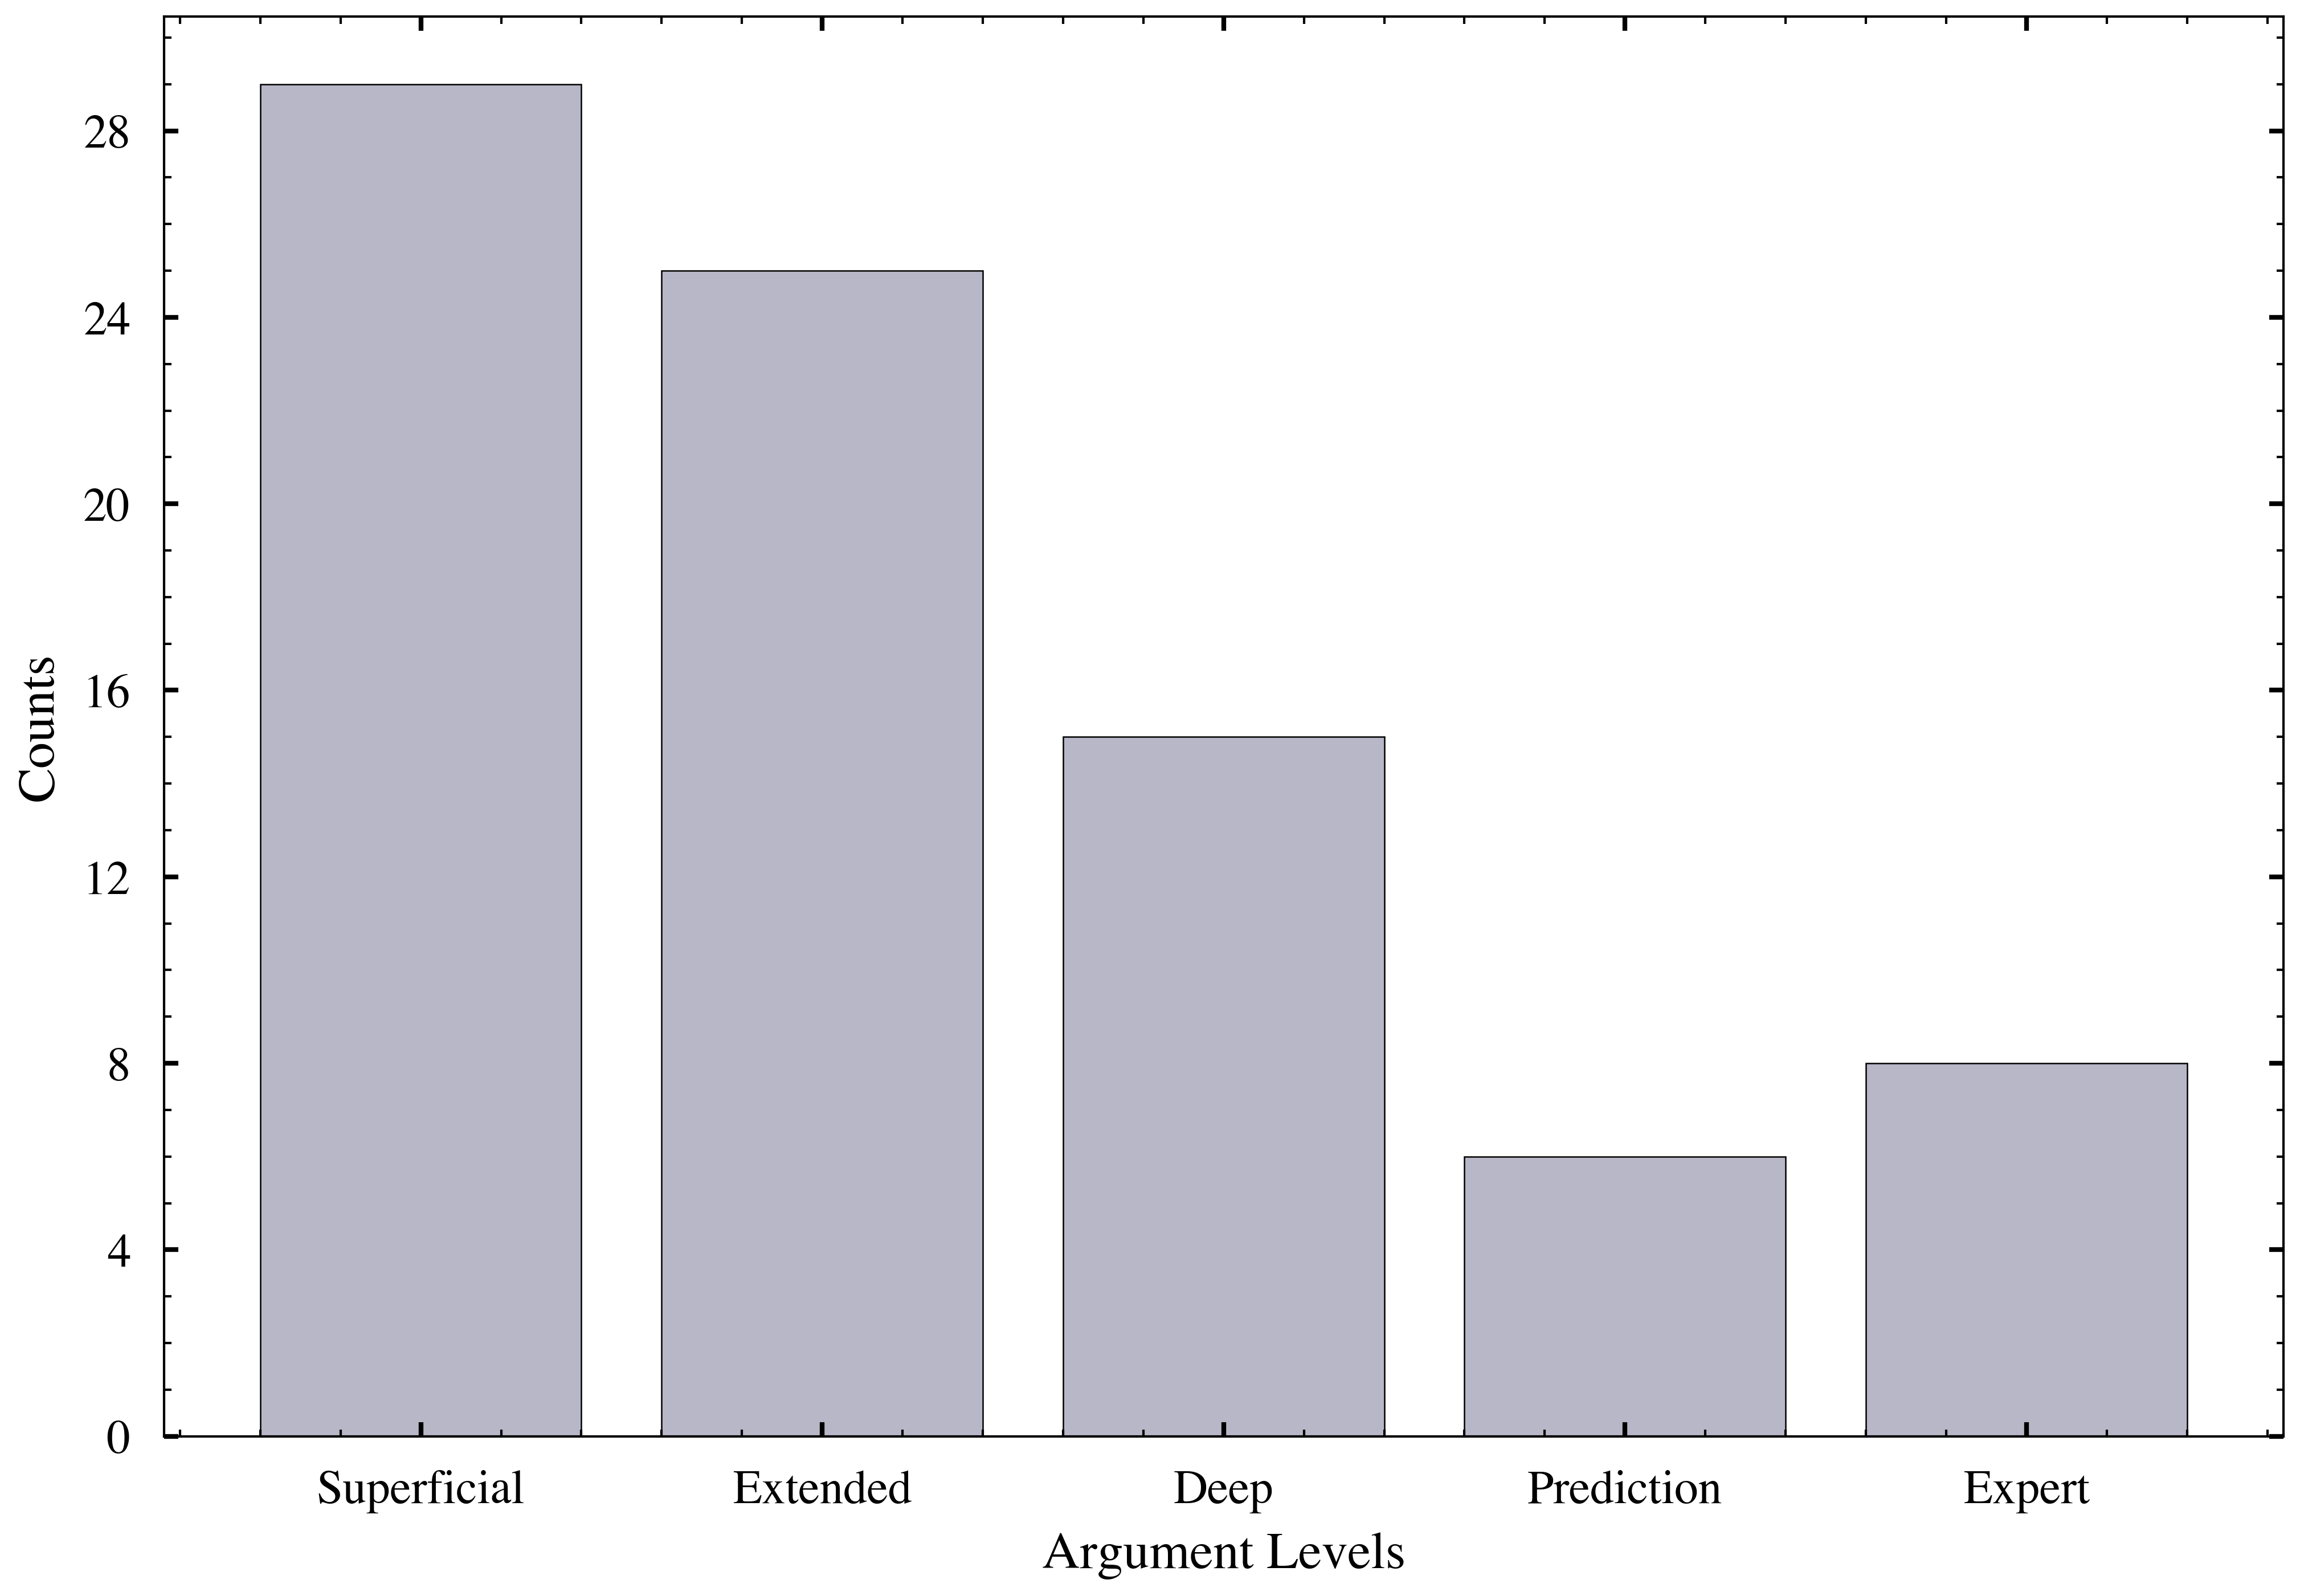

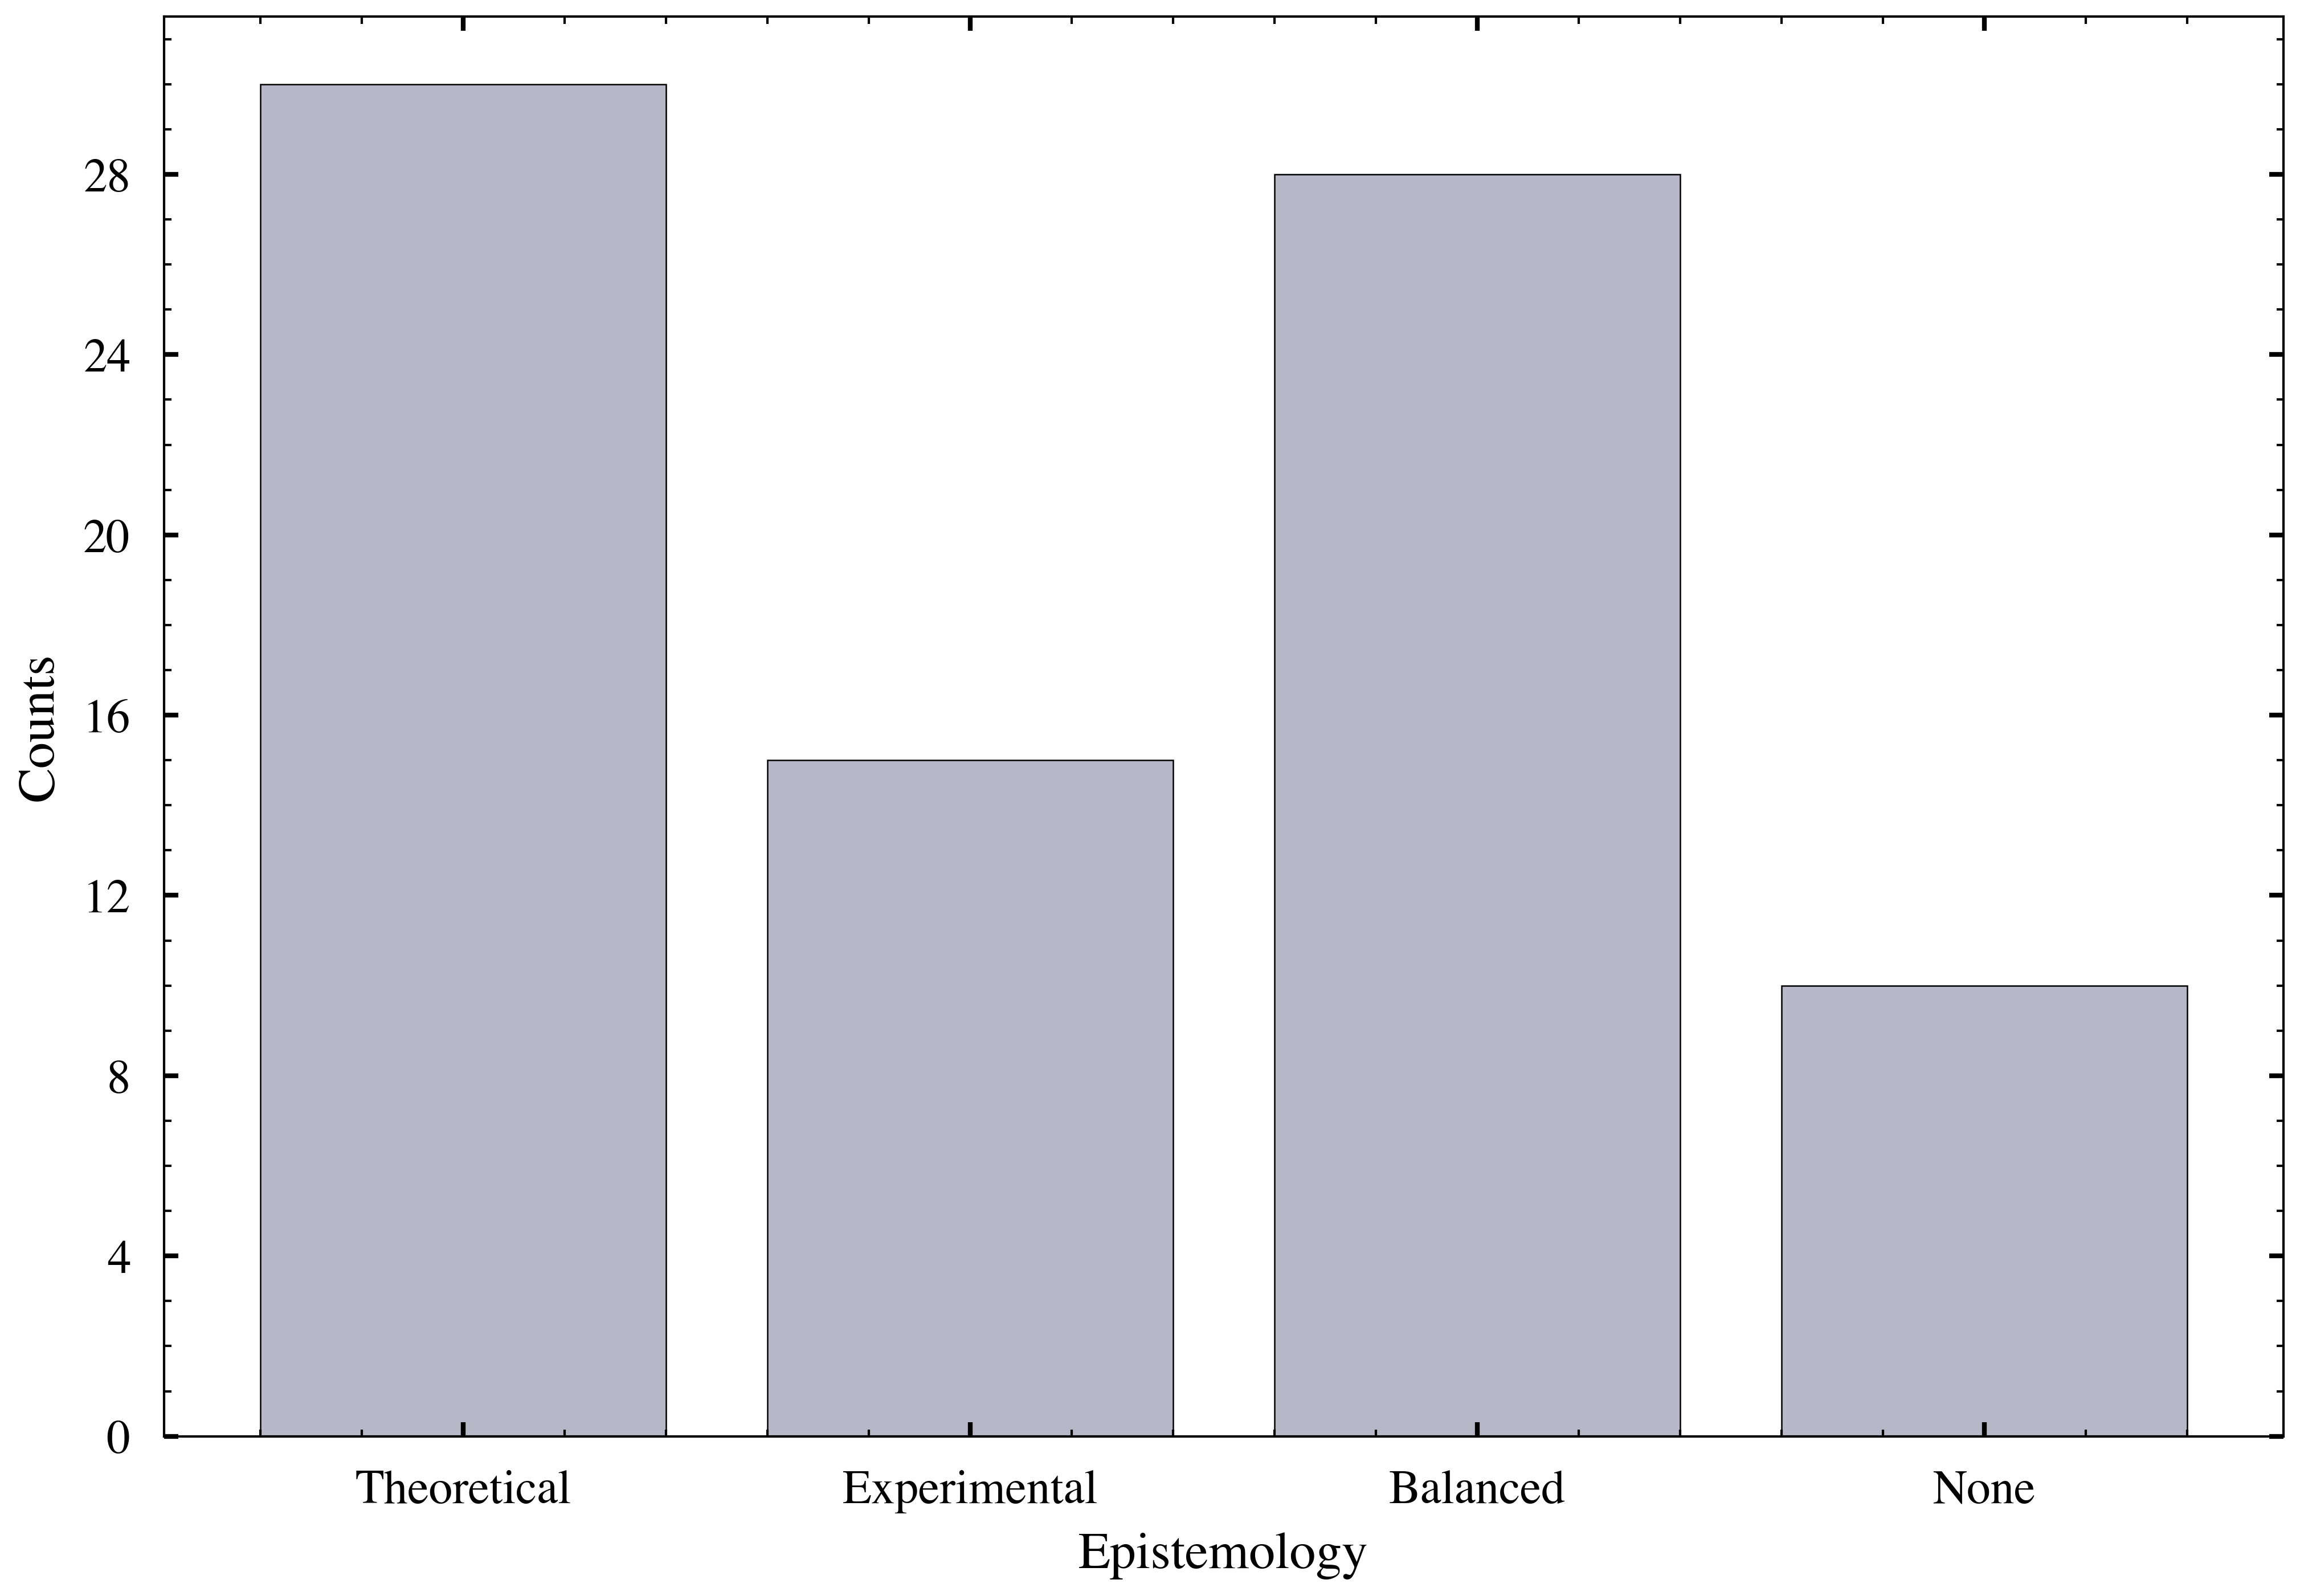

In [3]:
df = pd.read_excel(r'data/labels_y2.xlsx', sheet_name="Sheet1")

ArgumentLevel = ['Superficial', 'Extended', 'Deep', 'Prediction', 'Expert', ]
dummy_dict = df['ArgumentLevel'].value_counts().to_dict()
counts = [dummy_dict[key] for key in ArgumentLevel]
# print(counts)
bar_plot(ArgumentLevel, counts, xlabel = 'Argument Levels', ylabel = 'Counts', filepath = 'outputs/y2/counts_vs_ArgumentLevel.png')

ReasoningLevel = ['THE', 'EXP', 'BAL', 'NONE']
dummy_dict = df['ReasoningLevel'].value_counts().to_dict()
print(dummy_dict)
counts = [dummy_dict[key] for key in ReasoningLevel]
ReasoningLevel = ['Theoretical', 'Experimental','Balanced', 'None']
bar_plot(ReasoningLevel, counts, xlabel = 'Epistemology', ylabel = 'Counts', filepath = 'outputs/y2/counts_vs_Epistemology.png')

# 2. Create Year2 CSV data file for training

In [28]:
# Indicate path

# input
dir_xml = '/Users/jiayangzhang/Library/CloudStorage/OneDrive-ImperialCollegeLondon/year4/anonymised_reports/year_2_2018/xml'
dir_txt = '/Users/jiayangzhang/Library/CloudStorage/OneDrive-ImperialCollegeLondon/year4/anonymised_reports/year_2_2018/txt'
csv_in = 'data/labels_y2.xlsx'

# output
csv_out = 'outputs/sections/labels_cleaned_y2.csv'

In [29]:
# -- unpack xml files --

counter = 0

for file in os.listdir(dir_xml):
    if file.startswith('2ndINT_') and file.endswith('.tei.xml'):

        # Count # of files
        counter += 1

        # Get StudentID
        filename = file.rsplit('.', maxsplit=2)[0]

        # Extract text from reports
        utils.xml_to_txt(dir_xml, dir_txt, filename, alltext=False, processtext = False)

print('Total number of files:', counter)



Cannot get results paragraph ...
error filename: 2ndINT_TFY667_Redacted
Cannot get results paragraph ...
error filename: 2ndINT_CTW087_Redacted
Cannot get results paragraph ...
error filename: 2ndINT_KSN764_Redacted
Cannot get results paragraph ...
error filename: 2ndINT_KUY555_Redacted
Cannot get results paragraph ...
error filename: 2ndINT_MHH822_Redacted
Cannot get results paragraph ...
error filename: 2ndINT_GEI074_Redacted
Cannot get results paragraph ...
error filename: 2ndINT_MOX979_Redacted
Cannot get results paragraph ...
error filename: 2ndINT_LEH982_Redacted
Cannot get results paragraph ...
error filename: 2ndINT_BQD756_Redacted
Cannot get results paragraph ...
error filename: 2ndINT_SKD544_Redacted
Cannot get results paragraph ...
error filename: 2ndINT_LXZ649_Redacted
Cannot get error paragraph ...
error filename: 2ndINT_LXZ649_Redacted
Cannot get results paragraph ...
error filename: 2ndINT_WSY182_Redacted
Cannot get results paragraph ...
error filename: 2ndINT_AAN562_Red

# unpack csv labels and txt files

In [30]:
# Build dataframe for texts
df_files = utils.build_files_dataframe(dir_txt, '2ndINT_', '.txt')

# Built dataframe for labels
df_labels = utils.build_labels_dataframe(csv_in)

# # Merge two dataframes
df = pd.merge(df_files, df_labels, left_on='StudentID', right_on='StudentID')      # merged dataframe: StudentID, Content, ArgumentLevel, ReasoningLevel

# Check # of reports
print('# of reports: ',len(df.index))

# Save merged dataframe as csv
df.to_csv(csv_out, encoding='utf-8')

# of reports:  83


# Sanky Diagram

In [32]:
# Find the IDs that exists in year1 and year2
df_y1 = pd.read_csv(r'outputs/labels_cleaned_y1c1c2.csv')
df_y2 = pd.read_csv(r'outputs/labels_cleaned_y2.csv')


# simplify student ID in y1 data
name_list = []
for name in list(df_y1['StudentID']):
    name_list.append(name.split('_')[1])
df_y1['StudentID'].replace(list(df_y1['StudentID']), name_list, regex=True, inplace=True)

# simplify student ID in y2 data
name_list = []
for name in list(df_y2['StudentID']):
    name_list.append(name.split('_')[1])
df_y2['StudentID'].replace(list(df_y2['StudentID']), name_list, regex=True, inplace=True)


# Change headers
headerdict_y1 = {'Content': 'ContentY1', 'ArgumentLevel': 'ArgumentLevelY1', 'ReasoningLevel': 'ReasoningLevelY1'}
df_y1.rename(columns=headerdict_y1, inplace=True)

headerdict_y2 = {'Content': 'ContentY2', 'ArgumentLevel': 'ArgumentLevelY2', 'ReasoningLevel': 'ReasoningLevelY2'}
df_y2.rename(columns=headerdict_y2, inplace=True)


# drop Content columns
df_y1.drop('ContentY1',axis=1, inplace=True)
df_y2.drop('ContentY2',axis=1, inplace=True)




In [33]:
# Merge datasets
'''
Keep all rows from the left data frame 
and only add values from df2 where a matching key is available
'''
df = pd.merge(df_y2, df_y1, on="StudentID", how="left") # because Y2=83 has less entries than Y1=95.


# Find NaN values
# Replace any empty strings in the column with np.nan
df['ArgumentLevelY1'].replace('', np.nan, inplace=True)
# Drop the null values rows
df.dropna(axis=0, how = 'any', inplace=True)
df.to_csv('./temp.csv')


# Drop old index columns
df.drop(['Unnamed: 0_x', 'Unnamed: 0_y'], axis=1, inplace=True)

# # df size 
# print(df.shape[0])


# FLOWEAVER -- Sankey

In [284]:
# Shape dataframe for ArgumentLevel SANKEY diagram
df_argument = df.drop(['ReasoningLevelY1', 'ReasoningLevelY2'], axis=1, inplace=False)  #drop ReasoningLevels
headerdict = {'ArgumentLevelY1': 'source', 'ArgumentLevelY2':'target', 'StudentID':'type'}
df_argument.rename(columns=headerdict, inplace='True') #rename headers
df_argument['value'] = 1

'''
# USING FLOWEAVER
# Build SANKEY diagram
nodes = {
    "ArgumentLevelY1": ProcessGroup(['superficial', 'extended', 'deep', 'prediction', 'expert', ]),
    "ArgumentLevelY2": ProcessGroup(['superficial', 'extended', 'deep', 'prediction', 'expert', ]),
}

# # How groups are placed in the diagram 
ordering = [["ArgumentLevelY1"], ["ArgumentLevelY2"]]
bundles = [Bundle("ArgumentLevelY1", "ArgumentLevelY2")]
sdd = SankeyDefinition(nodes, bundles, ordering)

# # diagram size 
weave(sdd, df_argument).to_widget().auto_save_png('temporary.png')
'''

'\n# USING FLOWEAVER\n# Build SANKEY diagram\nnodes = {\n    "ArgumentLevelY1": ProcessGroup([\'superficial\', \'extended\', \'deep\', \'prediction\', \'expert\', ]),\n    "ArgumentLevelY2": ProcessGroup([\'superficial\', \'extended\', \'deep\', \'prediction\', \'expert\', ]),\n}\n\n# # How groups are placed in the diagram \nordering = [["ArgumentLevelY1"], ["ArgumentLevelY2"]]\nbundles = [Bundle("ArgumentLevelY1", "ArgumentLevelY2")]\nsdd = SankeyDefinition(nodes, bundles, ordering)\n\n# # diagram size \nweave(sdd, df_argument).to_widget().auto_save_png(\'temporary.png\')\n'

# pySankey -- Sankey

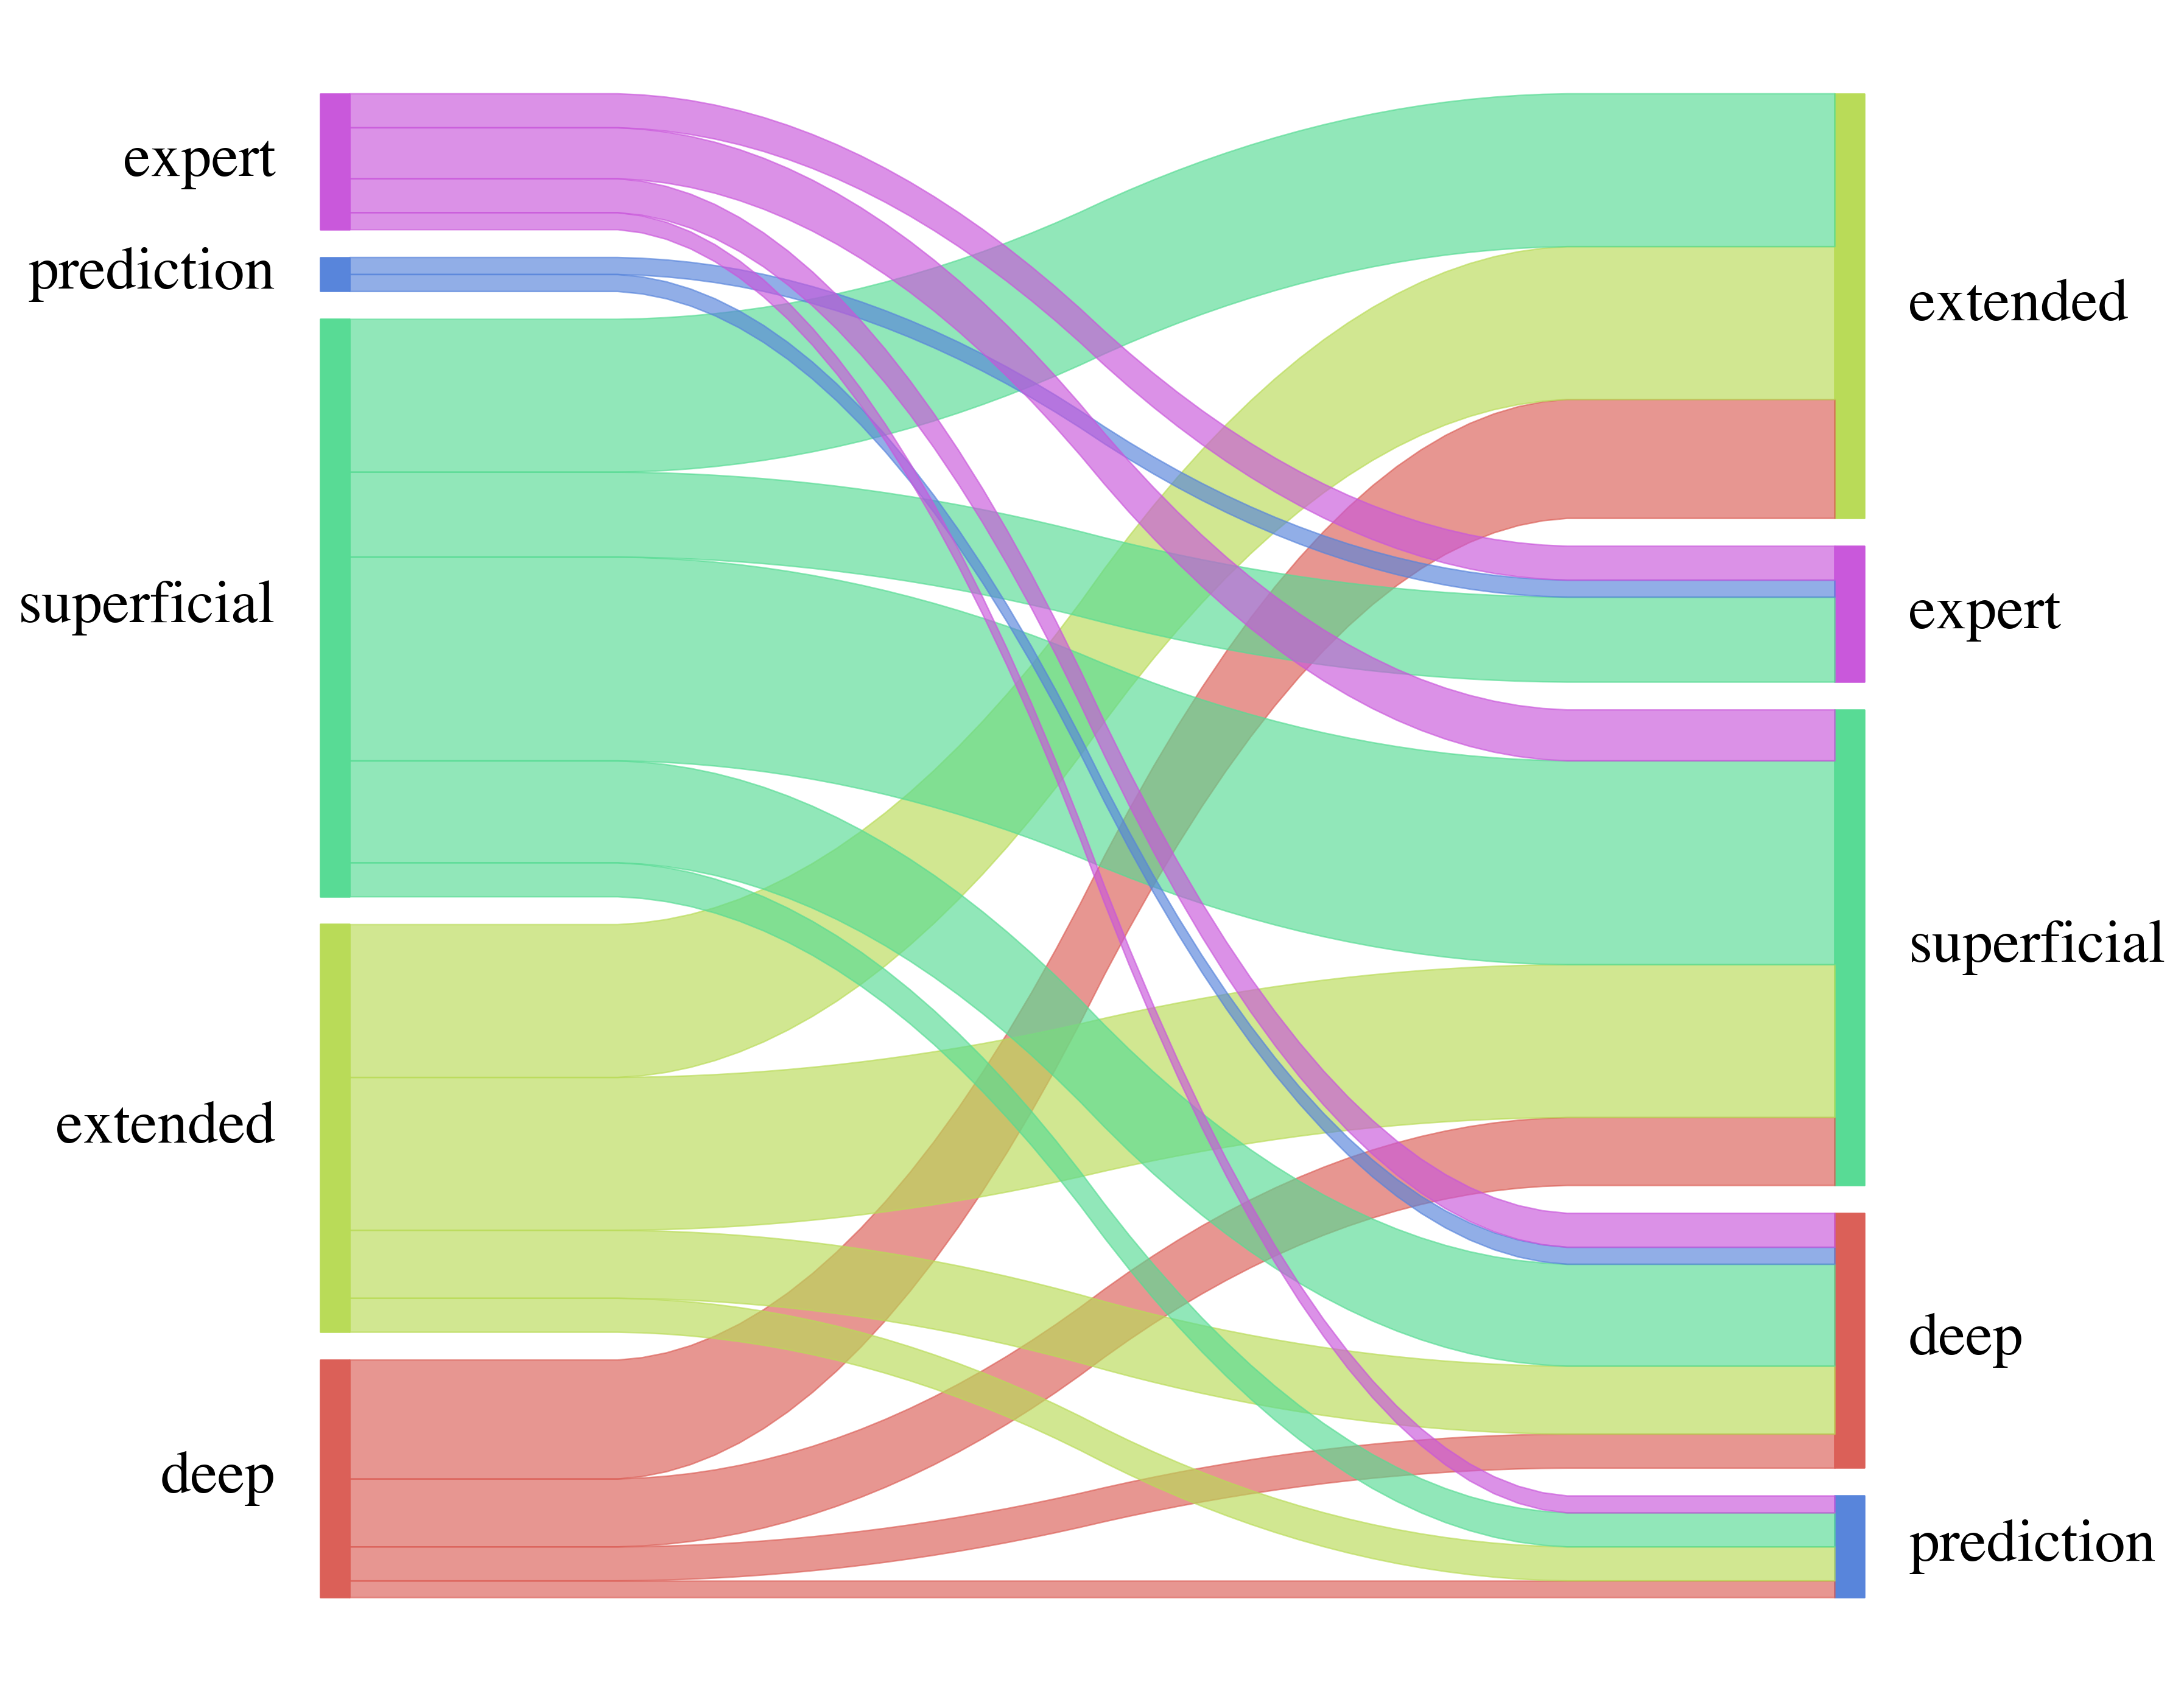

In [271]:
# USING pySankey

colorDict = {
    'superficial':'#f71b1b',
    'extended':'#1b7ef7',
    'deep':'#f3f71b',
    'prediction':'#12e23f',
    'expert':'#f78c1b'
}

sankey.sankey( 
    left=df["ArgumentLevelY1"], right=df["ArgumentLevelY2"],
    aspect=20, fontsize=12,
    # colorDict=colorDict,
    )

plt.savefig('./figures/sankey/ArgumentLevelY1-Y2.png', bbox_inches='tight')

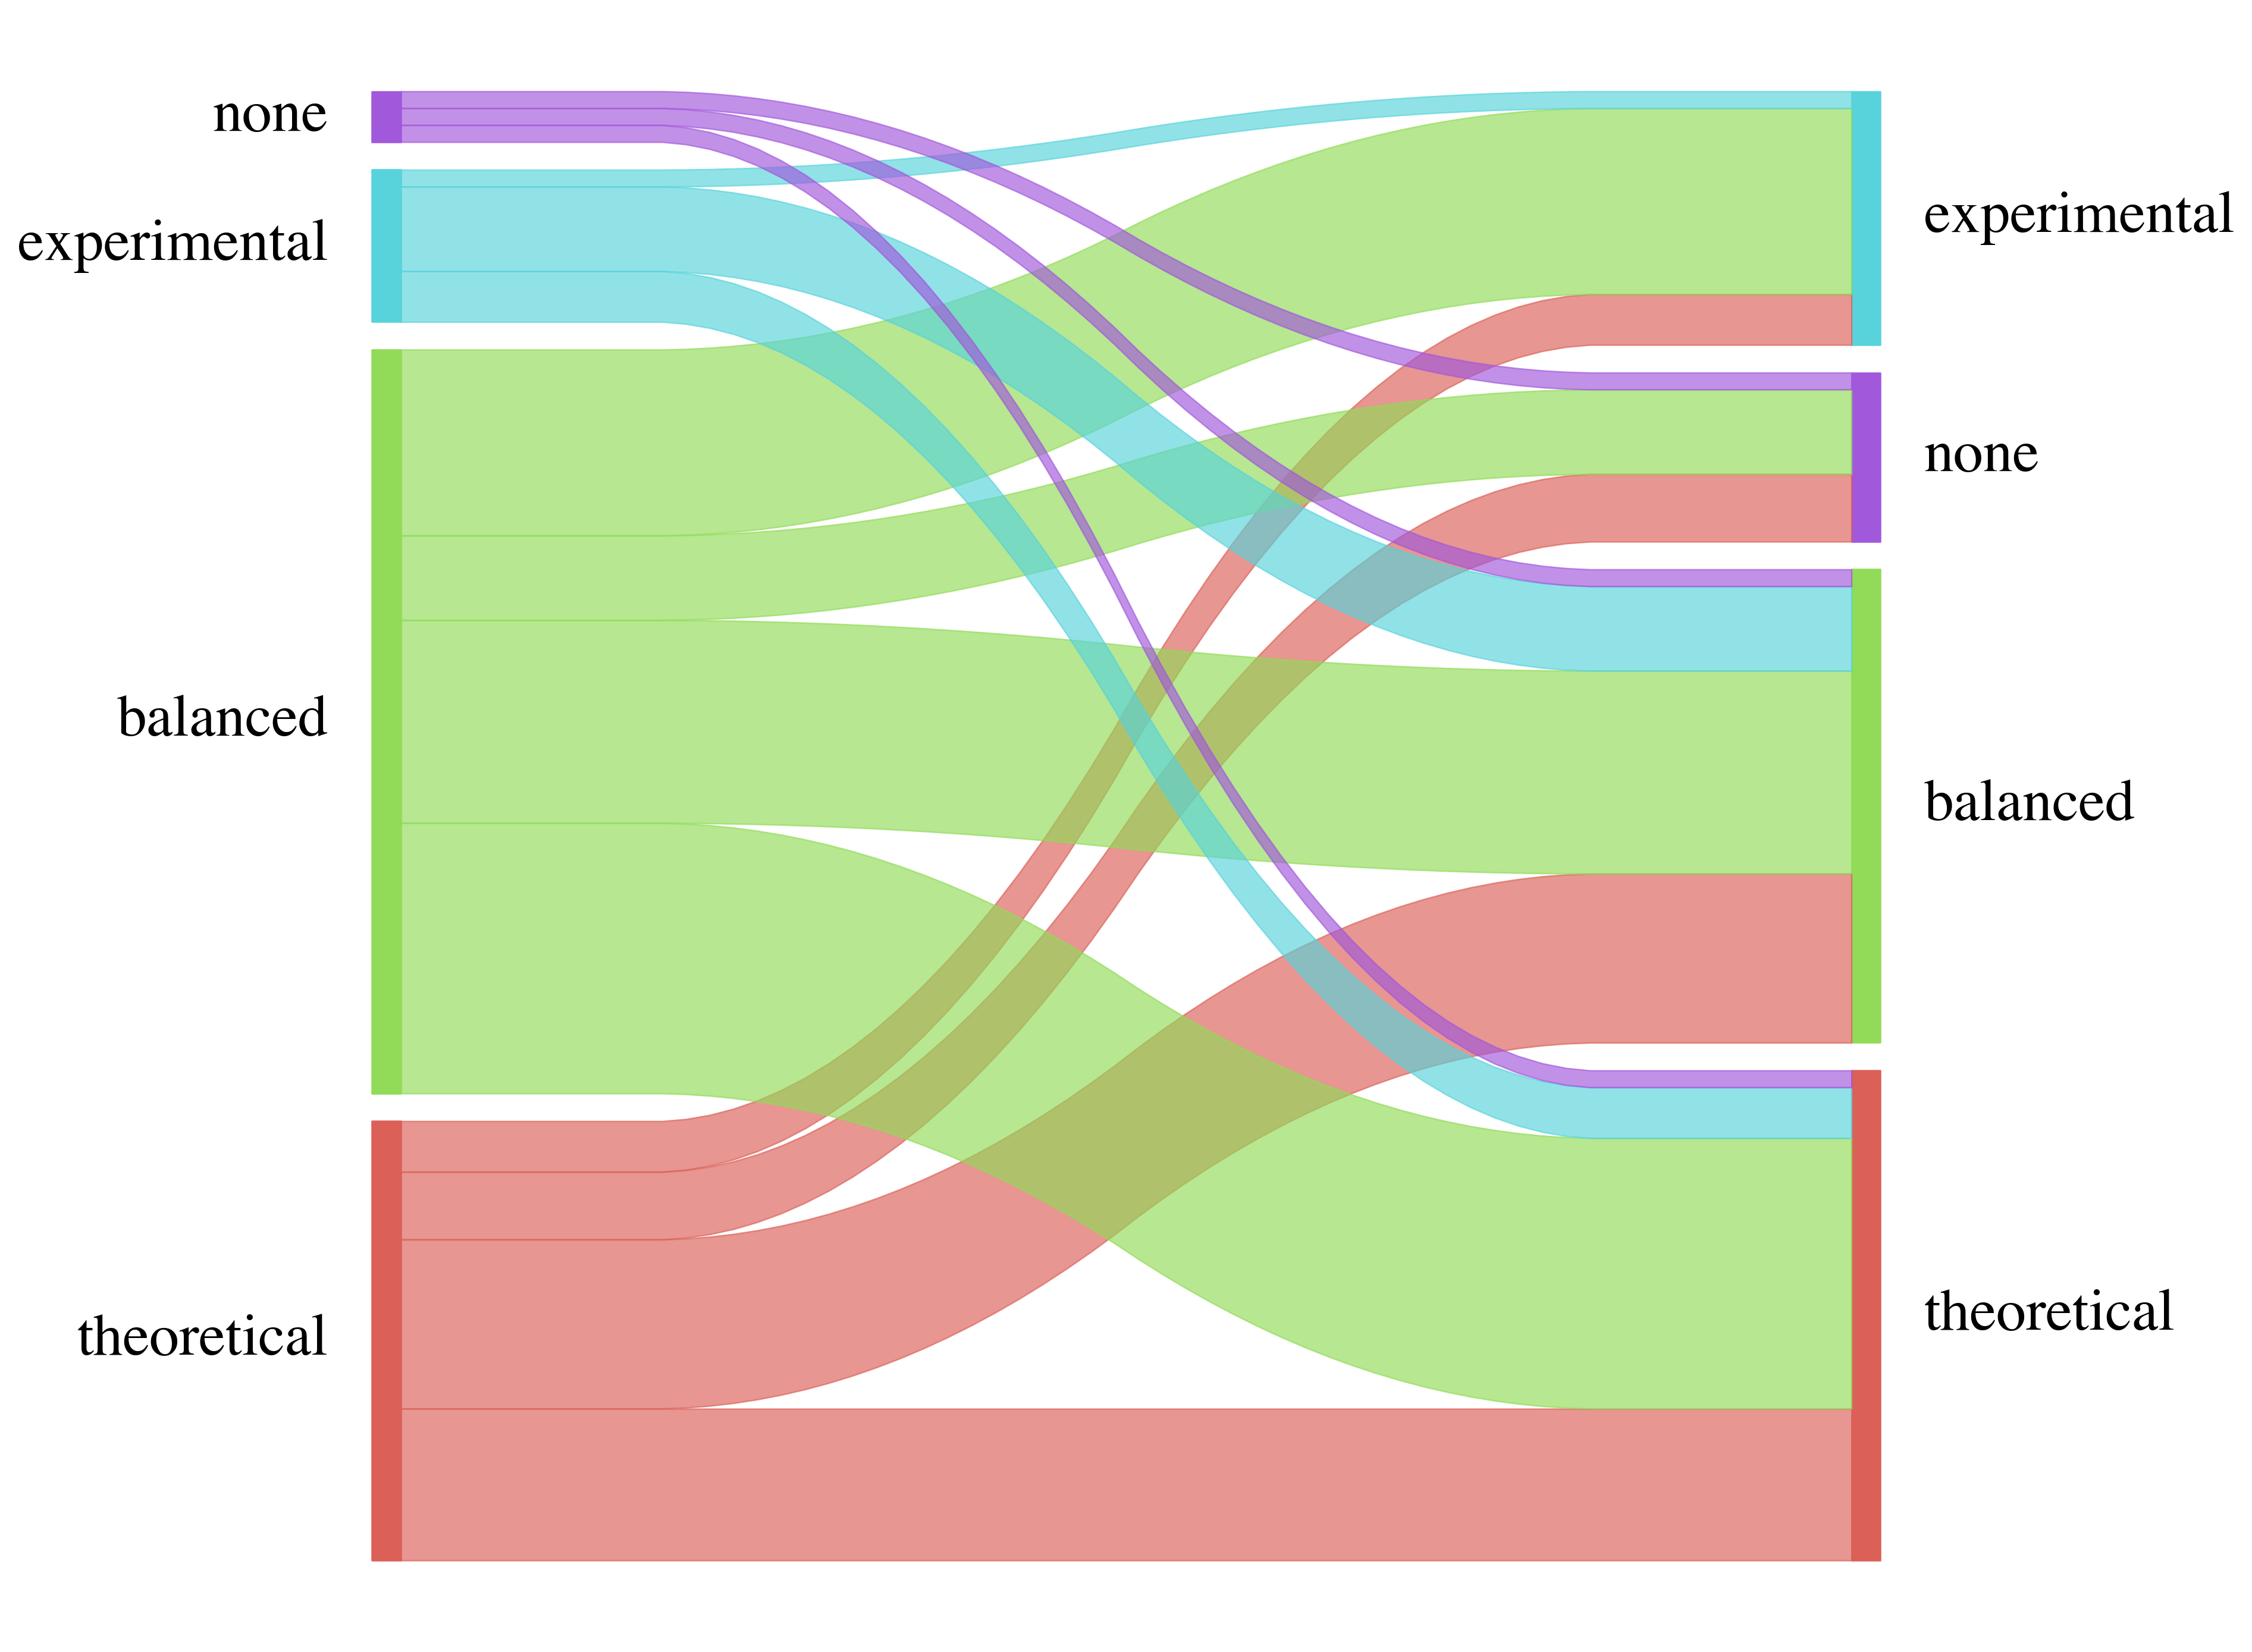

In [272]:
oldlabels = ['the', 'bal', 'exp', 'none']
newlabels = ['theoretical', 'balanced', 'experimental', 'none']
df.replace(oldlabels, newlabels, inplace=True)
sankey.sankey( 
    left=df["ReasoningLevelY1"], right=df["ReasoningLevelY2"],
    aspect=20, fontsize=12,
    # colorDict=colorDict,
    )

plt.savefig('./figures/sankey/EpistemologyY1-Y2.png', bbox_inches='tight')

# Plotly -- Sankey

In [298]:
# USING plotly

# Modify data for Plotly
def plotly_argument_count(dataframe, source_string, target_string):
    value = 0
    for index in range(dataframe.shape[0]):
        if (dataframe.iloc[index]['ArgumentLevelY1'] == source_string) and (dataframe.iloc[index]['ArgumentLevelY2'] == target_string):
            value += 1
    return source_string, target_string, value


source_list = []
target_list = []
value_list = []

label_list = ['superficial', 'extended', 'deep', 'prediction', 'expert']
for x in label_list:
    for y in label_list:
        # print(x, y)
        source, target, value = plotly_argument_count(df, x, y)

        source_list.append(source)
        target_list.append(target)
        value_list.append(value)
print(source_list, target_list, value_list) # each list has 25 elements

df_sankey_argumemt = pd.DataFrame()
df_sankey_argumemt['ArgumentLevelY1'] = source_list
df_sankey_argumemt['ArgumentLevelY2'] = target_list
df_sankey_argumemt['value'] = value_list
df_sankey_argumemt.to_csv('./figures/sankey/ArgumentLevelY1-Y2.csv')


['superficial', 'superficial', 'superficial', 'superficial', 'superficial', 'extended', 'extended', 'extended', 'extended', 'extended', 'deep', 'deep', 'deep', 'deep', 'deep', 'prediction', 'prediction', 'prediction', 'prediction', 'prediction', 'expert', 'expert', 'expert', 'expert', 'expert'] ['superficial', 'extended', 'deep', 'prediction', 'expert', 'superficial', 'extended', 'deep', 'prediction', 'expert', 'superficial', 'extended', 'deep', 'prediction', 'expert', 'superficial', 'extended', 'deep', 'prediction', 'expert', 'superficial', 'extended', 'deep', 'prediction', 'expert'] [12, 9, 6, 2, 5, 9, 9, 4, 2, 0, 4, 7, 2, 1, 0, 0, 0, 1, 0, 1, 3, 0, 2, 1, 2]


In [299]:
# Modify ReasoningLevel data for Plotly
def plotly_reasoning_count(dataframe, source_string, target_string):
    value = 0
    for index in range(dataframe.shape[0]):
        if (dataframe.iloc[index]['ReasoningLevelY1'] == source_string) and (dataframe.iloc[index]['ReasoningLevelY2'] == target_string):
            value += 1
    return source_string, target_string, value


source_list = []
target_list = []
value_list = []

label_list = ['the', 'bal', 'exp', 'none']
for x in label_list:
    for y in label_list:
        # print(x, y)
        source, target, value = plotly_reasoning_count(df, x, y)

        source_list.append(source)
        target_list.append(target)
        value_list.append(value)
print(source_list, target_list, value_list) # each list has 25 elements


df_sankey_reasoning = pd.DataFrame()
df_sankey_reasoning['ReasoningLevelY1'] = source_list
df_sankey_reasoning['ReasoningLevelY2'] = target_list
df_sankey_reasoning['value'] = value_list
df_sankey_reasoning.to_csv('./figures/sankey/EpistemologyY1-Y2.csv')


['the', 'the', 'the', 'the', 'bal', 'bal', 'bal', 'bal', 'exp', 'exp', 'exp', 'exp', 'none', 'none', 'none', 'none'] ['the', 'bal', 'exp', 'none', 'the', 'bal', 'exp', 'none', 'the', 'bal', 'exp', 'none', 'the', 'bal', 'exp', 'none'] [9, 10, 3, 4, 16, 12, 11, 5, 3, 5, 1, 0, 1, 1, 0, 1]


In [304]:
# Modify Data -- String to Index
label_list = ['superficial', 'extended', 'deep', 'prediction', 'expert']
df_sankey_argumemt.replace(label_list, [0,1,2,3,4], inplace=True)
source_list = df_sankey_argumemt['ArgumentLevelY1'].tolist()
target_list = df_sankey_argumemt['ArgumentLevelY2'].tolist()
value_list = df_sankey_argumemt['value'].tolist()

# To Sankey
link = dict(source = source_list, target = target_list, value = value_list)
node = dict(label = label_list, pad=15, thickness=5)
data = go.Sankey(link = link, node=node)

# plot
fig = go.Figure(data)
fig.show()